In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scripts.read_land_use_no_gdal as rlu
import scripts.read_image_data_scaleable as rid
import datetime
import shelve
from collections import Counter

In [2]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data_scaleable' from '../scripts/read_image_data_scaleable.py'>

In [3]:
image_dir='../area3/2014/images/'
mask_dir='../area3/2014/masks/'
table_dir='../area3/2014/tables/LC8_SR.csv'
new_table_dir='../area3/2015/tables/LC8_SR.csv'
shelve_root_dir='../models/area3/shelves/'
processes=8
max_days_apart=30
step=250000

In [14]:
imgs = shelve.open(shelve_root_dir + 'old/combined')

In [15]:
def open_img(img_id, img_dir, res):
    return np.memmap(img_dir + img_id, dtype='int16', mode='r', shape=res)

In [24]:
first_ts, first_res = list(imgs.items())[1]

In [25]:
img0 = open_img(first_ts, shelve_root_dir + 'old/maps/', first_res)

In [26]:
img0.shape

(5, 1976, 2387)

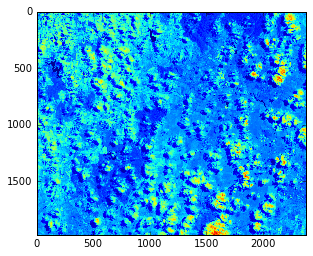

In [27]:
plt.imshow(img0[0, :, :])

In [28]:
cnt = Counter(img0[0, :, :].flatten())

In [29]:
print(cnt.most_common(5))

[(2954, 2219), (2878, 2214), (3042, 2208), (2892, 2207), (2896, 2199)]
